# **Connecting to the google drive**

In [3]:
# File is stored in the drive so we link the drive to access the file 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Importing the libraries**

In [4]:
# We import the required modules for machine learning, like numpy, pandas and matplotlib 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Importing the dataset**

In [13]:
# we import the data using pandas module and import the 3rd and 4th column into x and y respectively
data = pd.read_csv('/content/drive/MyDrive/polynomial_linear_regression/Position_Salaries_poly.csv')
x=data.iloc[:,1:-1].values
y=data.iloc[:,-1].values
print(data)
print("----------------------------------------------------------------------")
print(x)
print("----------------------------------------------------------------------")
print(y)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000
----------------------------------------------------------------------
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
----------------------------------------------------------------------
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


# **Training the Linear Regression model on the whole data set**

In [6]:
# we use the train set to train the linear regression model on the whole data 
# we do this directly because the data imported does not have any categorical data
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(x,y)

LinearRegression()

# **Training the Polynomial Regression model on the whole data set**

In [14]:
# we use the train set to train the polynomial regression model but be fore that we need to do a bit of preprocessing 
# we need to the values with a power in a matrix
from sklearn.preprocessing import PolynomialFeatures
polyreg=PolynomialFeatures(degree=4)
X1=polyreg.fit_transform(x)
model = LinearRegression()
model.fit(X1, y)

LinearRegression()

# **Visualising the Linear Regression Results**

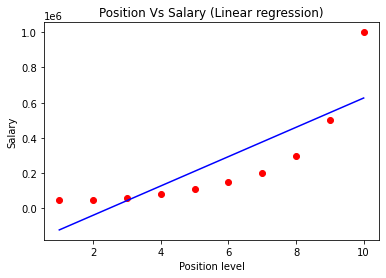

In [29]:
# Plotting the linear regression results
plt.scatter(x, y, color= 'red')
plt.plot(x, regressor.predict(x), color= 'blue')
plt.title('Position Vs Salary (Linear regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# **Visualising the Polynomial Regression Results**



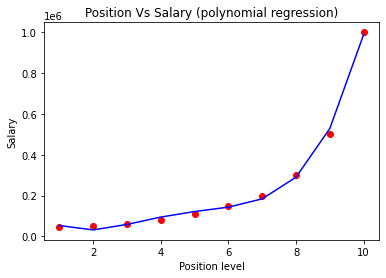

In [27]:
# Plotting the polynomial regression results
plt.scatter(x, y, color= 'red')
plt.plot(x, model.predict(polyreg.fit_transform(x)), color= 'blue')
plt.title('Position Vs Salary (polynomial regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# **Visualising the Polynomial Regression Results (With Higher Resolution and smooth curve)**



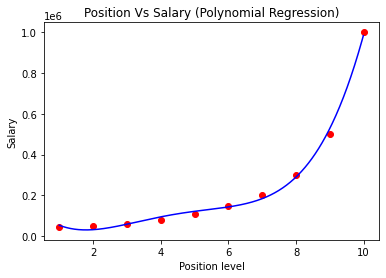

In [31]:
# Plotting the polynomial regression but smoothing the curve 
X_grid = np.arange(min(x), max(x), 0.01) #  0.01 to make the graph smoother
X_grid = X_grid.reshape((len(X_grid), 1)) # reshapes the array to be a matrix
plt.scatter(x, y, color = 'red') # plots the training set
plt.plot(X_grid, model.predict(polyreg.fit_transform((X_grid))), color = 'blue') # plots a polynomial regression line
plt.title('Position Vs Salary (Polynomial Regression)') # adds tittle to the plot
plt.xlabel('Position level') # adds label to the x-axis
plt.ylabel('Salary') # adds label to the y-axis
plt.show() # prints our plot

# **Predicting a new result with Linear Regression**

In [36]:
# Predicting the salary of the level 11 using linear regression
regressor.predict([[11]])

array([709872.79843444])

# **Predicting a new result with Polynomial Regression**

In [37]:
# Predicting the salary of the level 11 using polynomial regression
model.predict(polyreg.fit_transform([[11]]))

array([1780833.33333359])